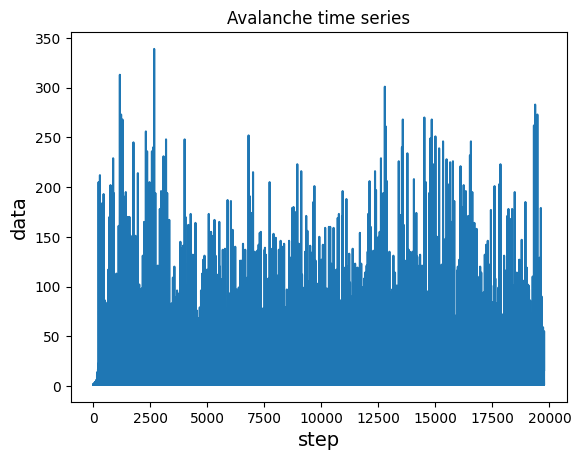

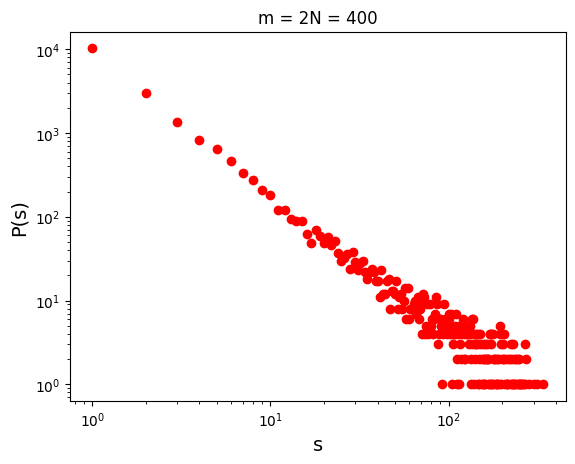

In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import powerlaw
from main_numpy import NeuronModel


#Creates a barabasi-Albert network with a sink node and 
#uses a certain probability to connect nodes to the sink node
def barabasi_albert(size, m, p_sink=0.4, steps=50000, delay= 200):
    ba_network = nx.barabasi_albert_graph(size, m, seed=123, initial_graph=None)
    ba_network.add_node(-1)  # Adding the sink node

# Iterate over each node (not the sink node)
    for node in ba_network.nodes():
        if node != -1:
            if np.random.random() < p_sink: #rule for connecting node to a sink node
                ba_network.add_edge(node, -1)

    model = NeuronModel(ba_network, sample_delay=delay, start_filled=False)
    data = np.array(model.run(steps))
    
    return data

###Data for avalanches of sandpile model implemented on a Barabasi-Albert Network 

##Avalanches for fixed amount of Nodes N and parameter m

if __name__ == '__main__':
    
    #Initialize specific variables 
    Nodes = 400 #Amount of nodes
    m = 2 #Amount of old nodes that new node connects with 
    
    #Generate and extract avalanche data
    data = barabasi_albert(Nodes, m)
    aval_sizes, aval_frequencies = np.unique(data, return_counts=True)
    
    
    #Plots    
    #Avalanche size time series 
    plt.title("Avalanche time series")
    plt.plot(data)
    plt.xlabel("step",fontsize=14)
    plt.ylabel("data",fontsize=14)
    plt.savefig("BA_series", dpi=300)
    plt.show()
    
    # Avalanche size distribution for m = 2 and N = 400
    plt.title("m = "+str(m)+"N = "+str(400))
    plt.scatter(aval_sizes,aval_frequencies, color='red')
    plt.xscale("log") #Set to logscale
    plt.yscale("log") #Set to logscale 
    plt.xlabel("s",fontsize=14)
    plt.ylabel("P(s)",fontsize=14)
    plt.savefig("BA_m=2_N=400", dpi=300)
    plt.show()

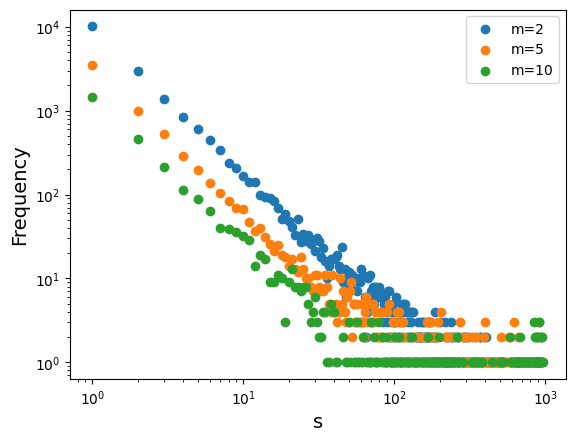

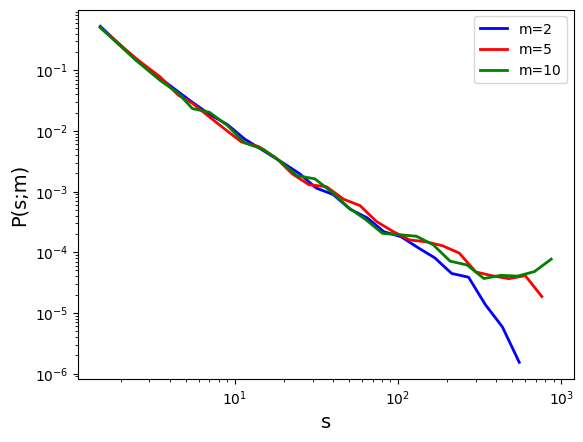

In [11]:
##Avalanches for varying parameter m with fixed amount of nodes

#Initialize variables 
m = [2,5,10]
Nodes = 1000
color_palette = ['b','red','g'] 

#Frequency of avalanche sizes
for i in range(len(m)):
        
    #Generate and extract avalanche data
    data = barabasi_albert(Nodes, m[i])
    aval_sizes, aval_frequencies = np.unique(data, return_counts=True)
        
    #Plot 
    plt.scatter(aval_sizes, aval_frequencies,label="m="+str(m[i]))
    plt.xscale("log") 
    plt.yscale("log")
    plt.xlabel("s",fontsize=14)
    plt.ylabel("Frequency",fontsize=14)
    plt.legend()
    plt.savefig("BA_frequency", dpi=300)
plt.show()


#Avalanche distribution P(s;m)
for i in range(len(m)):
        
    #Generate and extract avalanche data 
    data = barabasi_albert(Nodes, m[i])
        
    #Fit the data using powerlaw
    fit = powerlaw.Fit(data, xmin=1, xmax =Nodes, discrete=False) 
    aval_sizes, aval_counts = np.unique(data, return_counts=True)
        
    #Plot
    fit.plot_pdf(color=color_palette[i % len(color_palette)], linewidth=2, label="m=" + str(m[i]))
    plt.xscale("log") 
    plt.yscale("log")
    plt.xlabel("s",fontsize=14)
    plt.ylabel("P(s;m)",fontsize=14)
    plt.legend()
    plt.savefig("BA_p_m", dpi=300)
plt.show()

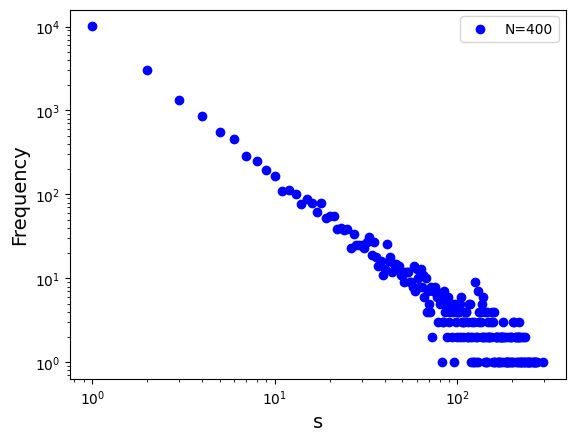

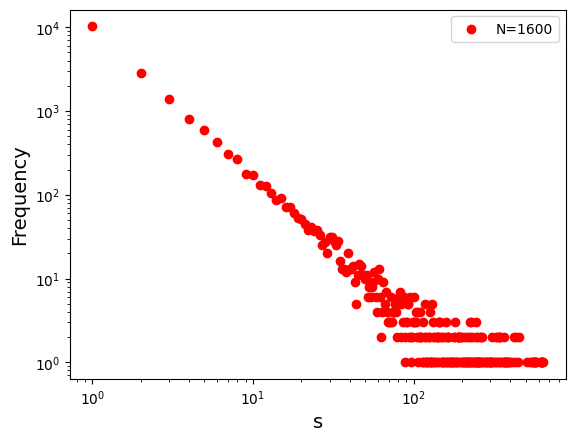

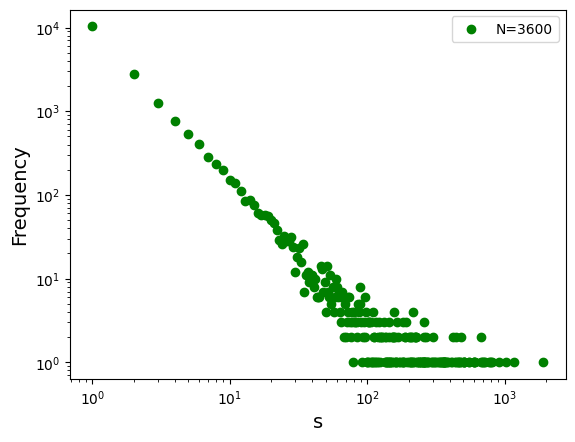

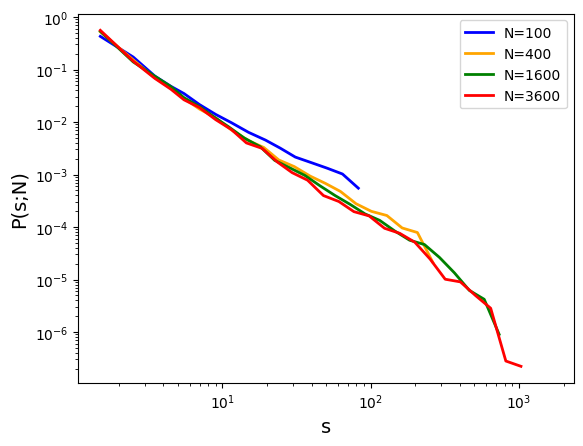

In [15]:
##Avalanches for varying amount of Nodes with fixed m

#Avalanche frequencies

#initialize variables
color_palette = ['b','r','g']  
Nodes = [400,1600,3600] 
m = 2

for i in range(len(Nodes)):
    
    #Generate and extract avalanche data 
    data = barabasi_albert(Nodes[i], m)
    aval_sizes, aval_frequencies = np.unique(data, return_counts=True)
        
    #Plot
    plt.scatter(aval_sizes, aval_frequencies,color=color_palette[i % len(color_palette)],label="N="+str(Nodes[i]))
    plt.xscale("log") 
    plt.yscale("log")
    plt.xlabel("s",fontsize=14)
    plt.ylabel("Frequency",fontsize=14)
    plt.legend()
    plt.savefig("BA_Frequency_N"+str(Nodes[i]), dpi=300)
    plt.show()

#Avalanche Distribution P(s;n)

#initialize variables
color_palette = ['b','orange','g','r']  
Nodes = [100,400,1600,3600]
    
for i in range(len(Nodes)):
        
    #Generate and extract avalanche data 
    data = barabasi_albert(Nodes[i], m)
    
    #fit the data using power law with exponential cutoff
    fit = powerlaw.Fit(data, xmin=1, xmax =Nodes[i], discrete=False)
    
    #Get the critical exponent of the fit 
    tau = fit.alpha
        
    #Plot
    fit.plot_pdf(color=color_palette[i % len(color_palette)], linewidth=2, label="N=" + str(Nodes[i]))
    plt.xscale("log") 
    plt.yscale("log")
    plt.xlabel("s",fontsize=14)
    plt.ylabel("P(s;N)",fontsize=14)
    plt.legend()
    plt.savefig("BA_p_N", dpi=300)
plt.show()

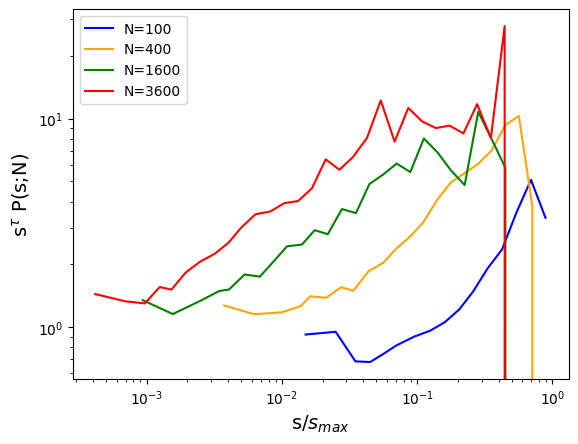

In [14]:
##Data Collapse for P(s;N)
    
#Initialize variables
color_palette = ['b','orange','g','r'] 
Nodes = [100,400,1600,3600] 
m = 2
    
for i in range(len(Nodes)): 
        
    #Generate and extract avalanche data 
    data = barabasi_albert(Nodes[i], m)
        
    #fit the data using power law with exponential cutoff
    fit = powerlaw.Fit(data, xmin=1, xmax =Nodes[i], discrete=False)
        
    #Extract the datapoints from the fit
    bins, y_fit = fit.pdf() 
    x_fit =  (bins[:-1] + bins[1:]) / 2
        
    #Get the critical exponent of the fit 
    tau = fit.alpha
 
    # Plot 
    plt.plot(x_fit/Nodes[i],(x_fit ** tau)*y_fit, color=color_palette[i % len(color_palette)], label="N=" + str(Nodes[i]))
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(r"s/$s_{max}$",fontsize=14)
    plt.ylabel(r"s$^\tau$ P(s;N)",fontsize=14)
    plt.legend()
    plt.savefig("Data_collapse", dpi=300)
plt.show()